In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
df_churn = pd.read_csv('Churn_Modelling.csv')
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df_churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In this case, i'll drop the Surname column because it have 2932 unique qualitative variables

In [4]:
df_churn.drop('Surname', axis=1, inplace=True)
df_churn.drop('RowNumber', axis=1, inplace=True)
df_churn.drop('CustomerId', axis=1, inplace=True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(pd.unique(df_churn['Geography']))

['France' 'Spain' 'Germany']


In [6]:
# Change qualitative variables
df_churn.loc[df_churn.Geography == "France", "Geography"] = 1
df_churn.loc[df_churn.Geography == "Spain", "Geography"] = 2
df_churn.loc[df_churn.Geography == "Germany", "Geography"] = 3

df_churn.loc[df_churn.Gender == "Female", "Gender"] = 1
df_churn.loc[df_churn.Gender == "Male", "Gender"] = 2
print(pd.unique(df_churn['Geography']))
print(df_churn.head())

[1 2 3]
   CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
0          619         1      1   42       2       0.00              1   
1          608         2      1   41       1   83807.86              1   
2          502         1      1   42       8  159660.80              3   
3          699         1      1   39       1       0.00              2   
4          850         2      1   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [7]:
Y = df_churn['Exited'].values
df_churn.drop('Exited', axis=1, inplace=True)
X = df_churn.values
print(Y.shape)
print(X.shape)

(10000,)
(10000, 10)


In [8]:
indexes = [0, 3, 5, 9]
for i in indexes:
    X[:,i] = X[:,i] / max(X[:,i])
    print(X[:,i])
X = X.astype(np.float32)

[0.7282352941176471 0.7152941176470589 0.5905882352941176 ...
 0.8341176470588235 0.908235294117647 0.9317647058823529]
[0.45652173913043476 0.44565217391304346 0.45652173913043476 ...
 0.391304347826087 0.45652173913043476 0.30434782608695654]
[0.0 0.33403147867725896 0.6363571759354565 ... 0.0 0.2992263113680937
 0.5187077749376251]
[0.5067634543058819 0.5627340588006109 0.5696792699405497 ...
 0.21043581238654574 0.46446006369839504 0.19096108013661311]


In [9]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.05)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9500, 10)
(9500,)
(500, 10)
(500,)


### Creating deep learning model

In [11]:
def classifier_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,10)),
        tf.keras.layers.Dense(5, activation='relu', input_shape=(1,10)),
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(1,5)),
    ])

    return model

In [88]:
classifierModel = classifier_model()
opt = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.85,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
classifierModel.compile(optimizer=opt,
                        loss='binary_crossentropy',
                        metrics=['accuracy']
                    )
classifierModel.build()

In [89]:
classifierModel.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1, 10)             110       
_________________________________________________________________
dense_25 (Dense)             (None, 1, 5)              55        
_________________________________________________________________
dense_26 (Dense)             (None, 1, 1)              6         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = classifierModel.fit(x=X_train, y=y_train, epochs=100, shuffle=True)

Epoch 1/100
297/297 [==============================] - 1s 2ms/step - loss: 0.7479 - accuracy: 0.5663
Epoch 2/100
297/297 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.7960
Epoch 3/100
297/297 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7960
Epoch 4/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7957
Epoch 5/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.7955
Epoch 6/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7968
Epoch 7/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7962
Epoch 8/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7983
Epoch 9/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8000
Epoch 10/100
297/297 [==============================] - 0s 2ms/step - loss: 0.4510 - accura

297/297 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8433
Epoch 75/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8423
Epoch 76/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8436
Epoch 77/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8414
Epoch 78/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8443
Epoch 79/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3677 - accuracy: 0.8432
Epoch 80/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3675 - accuracy: 0.8407
Epoch 81/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3676 - accuracy: 0.8433
Epoch 82/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8431
Epoch 83/100
297/297 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 

C:\Users\Giova\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

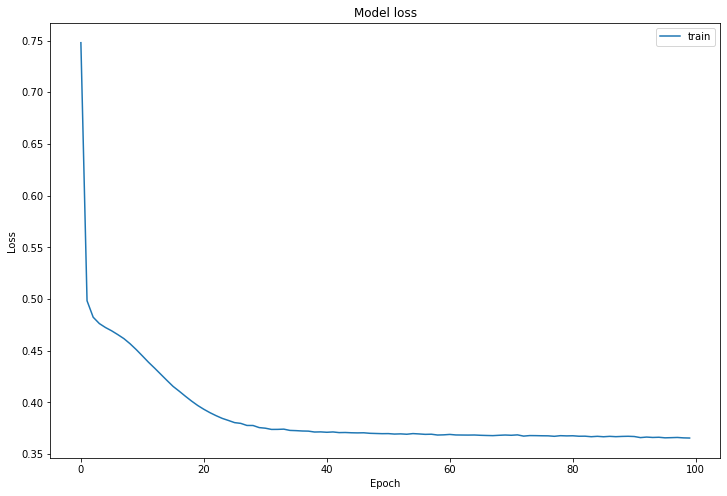

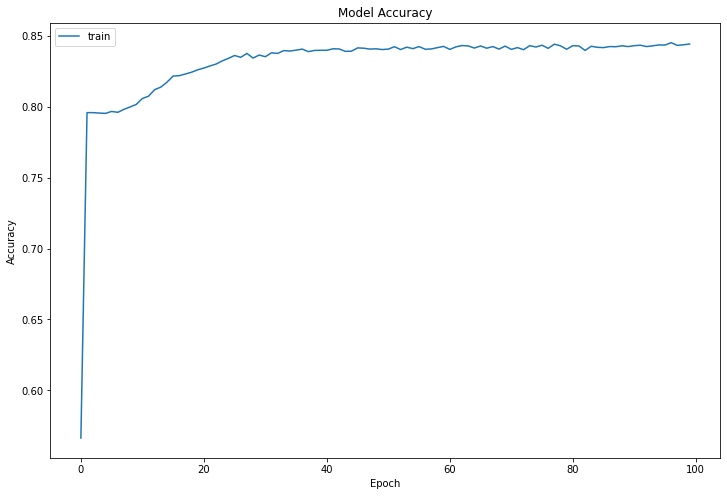

In [91]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss']]
df_loss.rename(columns={'loss':'train'},inplace=True)
df_acc= df_loss_acc[['accuracy']]
df_acc.rename(columns={'accuracy':'train'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [93]:
eval_ = classifierModel.evaluate(x=X_test, y=y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8420


After a hyperparameters tunning in a period of two days, the model presents a limit of accuracy aproximately of 84% - 86%, this is one of my best tries, a model with the %84

In [77]:
index_predict = list(range(90,100))

y_hat = classifierModel.predict(X_test)

print("Real label: " + str(y_test[index_predict]))
print("Predicted label: " + str(np.around(y_hat[index_predict])))

Real label: [0 0 1 0 0 0 0 1 0 1]
Predicted label: [[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
